In [11]:
# Install required packages if not already installed
import pandas as pd
import numpy as np
from autogluon.tabular import TabularPredictor
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [13]:
# Verify the environment
import sys
print(sys.executable)

/Users/jason/Desktop/vscode/.venv/bin/python


In [14]:
# Loading the Titanic dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [15]:
# Display a preview of the training data
print("Preview of training data:")
print(train_data.head())

Preview of training data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   

In [17]:
# Display information about the training data
print("\nTraining data info:")
print(train_data.info())


Training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [19]:
# Split training data into train and validation sets
train_set, val_set = train_test_split(train_data, test_size=0.2, random_state=6020, stratify=train_data['Survived'])
print(f"\nTraining set size: {len(train_set)}")
print(f"Validation set size: {len(val_set)}")


Training set size: 712
Validation set size: 179


In [20]:
# Initialize AutoGluon TabularPredictor
predictor = TabularPredictor(
    label='Survived',  # Target column
    path='autogluon_model',  # Path to save the model
    eval_metric='f1',  # Metric to optimize (F1 score for binary classification)
    verbosity=2  # Show detailed logs
)

In [21]:
# Train the model
predictor.fit(
    train_data=train_set,
    time_limit=300,  # Limit training time to 300 seconds
    presets='medium_quality'  # Use medium quality preset for faster training
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.11
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:24:16 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T6000
CPU Count:          10
Memory Avail:       14.55 GB / 32.00 GB (45.5%)
Disk Space Avail:   776.38 GB / 926.35 GB (83.8%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "/Users/jason/Desktop/vscode/auto-ml/autogluon_model"
Train Data Rows:    712
Train Data Columns: 11
Label Column:       Survived
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass',

In [22]:
# Display the leaderboard of models
print("\nModel leaderboard:")
print(predictor.leaderboard())


Model leaderboard:
                  model  score_val eval_metric  pred_time_val  fit_time  \
0       NeuralNetFastAI   0.820000          f1       0.004637  0.774170   
1   WeightedEnsemble_L2   0.820000          f1       0.005384  0.885869   
2        ExtraTreesGini   0.808081          f1       0.028141  0.253966   
3        ExtraTreesEntr   0.780000          f1       0.027243  0.286020   
4        NeuralNetTorch   0.773585          f1       0.005331  1.629163   
5              CatBoost   0.772277          f1       0.001756  2.242519   
6      RandomForestGini   0.772277          f1       0.024769  1.993909   
7              LightGBM   0.769231          f1       0.001766  0.809659   
8            LightGBMXT   0.767677          f1       0.001521  1.211212   
9               XGBoost   0.764706          f1       0.002250  0.507748   
10     RandomForestEntr   0.760000          f1       0.028129  0.260530   
11        LightGBMLarge   0.755102          f1       0.001540  2.920490   
12   

In [24]:
# Predict probabilities on the validation set
y_val = val_set['Survived']
y_pred_proba = predictor.predict_proba(val_set, as_multiclass=False)

/Users/jason/Desktop/vscode/.venv/lib/python3.10/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [25]:
# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba)
average_precision = average_precision_score(y_val, y_pred_proba)

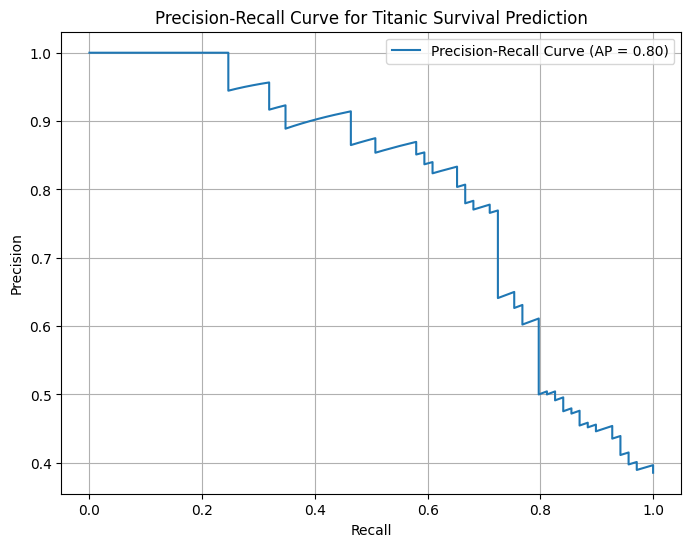


Average Precision: 0.802


In [27]:
# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Titanic Survival Prediction')
plt.legend()
plt.grid(True)
plt.show()

# Print the average precision score
print(f"\nAverage Precision: {average_precision:.3f}")

In [28]:
# Select a threshold based on the F1 score
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # Avoid division by zero
best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_idx]
print(f"\nBest threshold (based on F1 score): {best_threshold:.3f}")
print(f"Corresponding precision: {precision[best_threshold_idx]:.3f}")
print(f"Corresponding recall: {recall[best_threshold_idx]:.3f}")


Best threshold (based on F1 score): 0.415
Corresponding precision: 0.769
Corresponding recall: 0.725


In [29]:
# Apply the threshold to the validation set predictions
y_pred = (y_pred_proba >= best_threshold).astype(int)

# Evaluate classification performance on the validation set
print("\nClassification performance on validation set (using best threshold):")
print(f"Precision: {precision_score(y_val, y_pred):.3f}")
print(f"Recall: {recall_score(y_val, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_val, y_pred):.3f}")
print("\nDetailed classification report:")
print(classification_report(y_val, y_pred, target_names=['Not Survived', 'Survived']))


Classification performance on validation set (using best threshold):
Precision: 0.769
Recall: 0.725
F1 Score: 0.746

Detailed classification report:
              precision    recall  f1-score   support

Not Survived       0.83      0.86      0.85       110
    Survived       0.77      0.72      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [31]:
# Predict on the test set using the best threshold
test_pred_proba = predictor.predict_proba(test_data, as_multiclass=False)
test_pred = (test_pred_proba >= best_threshold).astype(int)

/Users/jason/Desktop/vscode/.venv/lib/python3.10/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [32]:
# Save the predictions to a submission file
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_pred
})
submission.to_csv('submission.csv', index=False)
print("\nPredictions saved to submission.csv")
print(submission.head())


Predictions saved to submission.csv
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
